In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [3]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 144s 1us/step


In [4]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
# Define the model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,
32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
# Compile and train the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
history.history

Epoch 1/10
1563/1563 [==============================] - 41s 25ms/step - loss: 1.5027 - accuracy: 0.4511 - val_loss: 1.2193 - val_accuracy: 0.5692
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1565 - accuracy: 0.5885 - val_loss: 1.1458 - val_accuracy: 0.5851
Epoch 3/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0153 - accuracy: 0.6408 - val_loss: 1.0323 - val_accuracy: 0.6448
Epoch 4/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.9228 - accuracy: 0.6775 - val_loss: 0.9768 - val_accuracy: 0.6598
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8508 - accuracy: 0.6997 - val_loss: 0.9586 - val_accuracy: 0.6669
Epoch 6/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.7876 - accuracy: 0.7242 - val_loss: 0.9419 - val_accuracy: 0.6812
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7347 - accuracy: 0.7418 - val_loss: 0.8865 -

{'loss': [1.5026867389678955,
  1.1565325260162354,
  1.0152814388275146,
  0.9228333830833435,
  0.850750207901001,
  0.7875712513923645,
  0.7347291111946106,
  0.6868528723716736,
  0.6467555165290833,
  0.60313880443573],
 'accuracy': [0.45113998651504517,
  0.5884799957275391,
  0.6407999992370605,
  0.6774799823760986,
  0.6997399926185608,
  0.7242199778556824,
  0.7418400049209595,
  0.7607399821281433,
  0.7723000049591064,
  0.7888799905776978],
 'val_loss': [1.219313621520996,
  1.1458441019058228,
  1.0322909355163574,
  0.9767856597900391,
  0.958564281463623,
  0.9418545961380005,
  0.8864680528640747,
  0.9046513438224792,
  0.8826728463172913,
  0.8819711804389954],
 'val_accuracy': [0.5691999793052673,
  0.585099995136261,
  0.6448000073432922,
  0.6597999930381775,
  0.6668999791145325,
  0.6812000274658203,
  0.6977999806404114,
  0.6973000168800354,
  0.7024999856948853,
  0.7091000080108643]}

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Choose a random image from the test dataset
i = np.random.randint(0, len(test_images))
img = test_images[i]

In [10]:
# Prepare the image to be used with the model
img_array = np.expand_dims(img, axis=0)


In [11]:
# Use the model to predict the image's class
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

1/1 [==============================] - 0s 384ms/step


In [12]:
# Define the CIFAR-10 classes
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

In [13]:
# Print the predicted and actual class of the image
print("Predicted class:", cifar10_classes[class_idx])
print("Actual class:", cifar10_classes[test_labels[i][0]])

Predicted class: bird
Actual class: deer


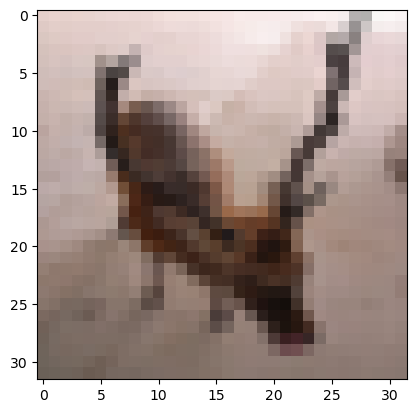

In [14]:
# Display the image
plt.imshow(img)
plt.show()